# Assignment 1 - Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import os
import folium


| Variable          | Description                                       |
|-------------------|---------------------------------------------------|
| step              | maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation). |
| type              | CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. |
| amount            | amount of the transaction in local currency. |
| nameOrig          | customer who started the transaction.                        |
| oldbalanceOrig     |  initial balance before the transaction.                        |
| newbalanceOrig    | new balance after the transaction.                        |
| nameDest          | customer who is the recipient of the transaction.                     |
| oldbalanceDest    |  initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).                         |
| newbalanceDest    | new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).                       |
| isFraud           | This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.             

**Dataset**: [mydata](https://www.kaggle.com/datasets/ealaxi/paysim1/)

In [2]:
# Open dataset
mydata = pd.read_csv("C:\\Users\\Chi Yung\\Desktop\\Fraud_data.csv")

### Data Transformations

In [3]:
# Rename a column
mydata.rename(columns={"oldbalanceOrg": "oldbalanceOrig"}, inplace=True)

In [4]:
# Exclude the 'isFlaggedFraud' column
mydata = mydata.drop(columns=["isFlaggedFraud"])

An interesting goal would be to see if one can develop an algorthim to find fraudulent transactions, so the column "isFlaggedFraud" is excluded.

In [5]:
# Convert 'type' to categorical
mydata["type"] = mydata["type"].astype("category")

In [6]:
# Handle missing values if any
mydata.dropna(inplace=True)

In [7]:
# Convert relevant columns to numeric
mydata["amount"] = pd.to_numeric(mydata["amount"], errors="coerce")
mydata["oldbalanceOrig"] = pd.to_numeric(mydata["oldbalanceOrig"], errors="coerce")
mydata["newbalanceOrig"] = pd.to_numeric(mydata["newbalanceOrig"], errors="coerce")
mydata["oldbalanceDest"] = pd.to_numeric(mydata["oldbalanceDest"], errors="coerce")
mydata["newbalanceDest"] = pd.to_numeric(mydata["newbalanceDest"], errors="coerce")

In [8]:
# Pivoting: Create a pivot table 
pivot_table = pd.pivot_table(mydata, values="amount", index="nameOrig", columns="type", aggfunc="sum", fill_value=0)
print(pivot_table)

type           CASH_IN   CASH_OUT  DEBIT   PAYMENT  TRANSFER
nameOrig                                                    
C1000000639       0.00  244486.46    0.0      0.00       0.0
C1000001337       0.00       0.00    0.0   3170.28       0.0
C1000001725       0.00       0.00    0.0   8424.74       0.0
C1000002591  261877.19       0.00    0.0      0.00       0.0
C1000003372   20528.65       0.00    0.0      0.00       0.0
...                ...        ...    ...       ...       ...
C999996999        0.00       0.00    0.0  26585.43       0.0
C999998175    37516.21       0.00    0.0      0.00       0.0
C999999254        0.00  244962.21    0.0      0.00       0.0
C999999614        0.00       0.00    0.0  15714.59       0.0
C999999784        0.00  275783.53    0.0      0.00       0.0

[6353307 rows x 5 columns]


### Perform the Exploratory Data Analysis

#### Overview of Data

In [9]:
mydata.head(5)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
mydata.tail()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [11]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrig  float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
dtypes: category(1), float64(5), int64(2), object(2)
memory usage: 443.0+ MB


In [12]:
mydata.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


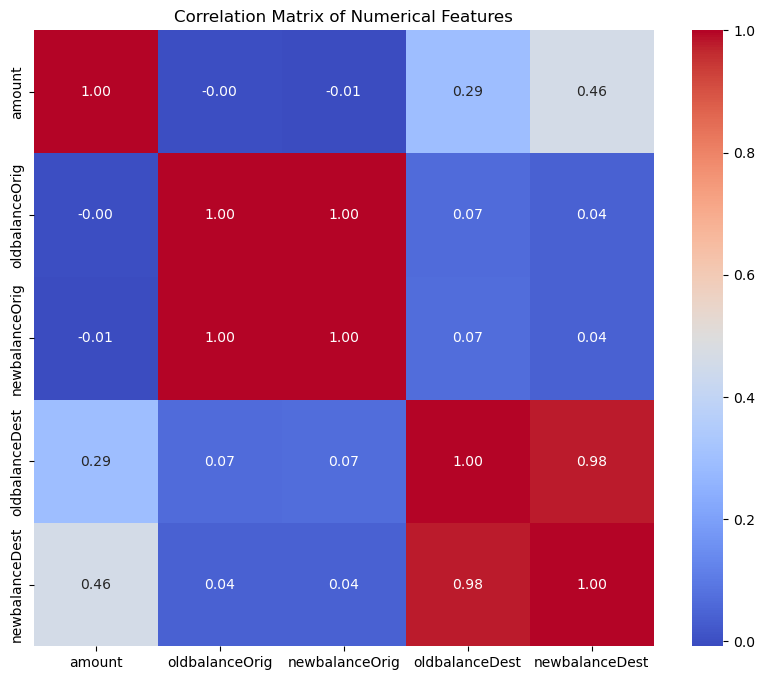

In [13]:
# Select relevant numerical columns for the heatmap
numerical_cols = ["amount", "oldbalanceOrig", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

# Create a correlation matrix
correlation_matrix = mydata[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### Analysis of "amount"

In [14]:
mydata["amount"]

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

In [15]:
mydata.amount.max()

92445516.64

In [16]:
mydata[mydata.amount > 1000000]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0
94,1,TRANSFER,1724887.05,C1495608502,0.00,0.0,C1590550415,3470595.10,19169204.93,0
358,1,TRANSFER,1538200.39,C476579021,0.00,0.0,C1590550415,6977445.38,19169204.93,0
359,1,TRANSFER,2421578.09,C106297322,0.00,0.0,C1590550415,8515645.77,19169204.93,0
...,...,...,...,...,...,...,...,...,...,...
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1


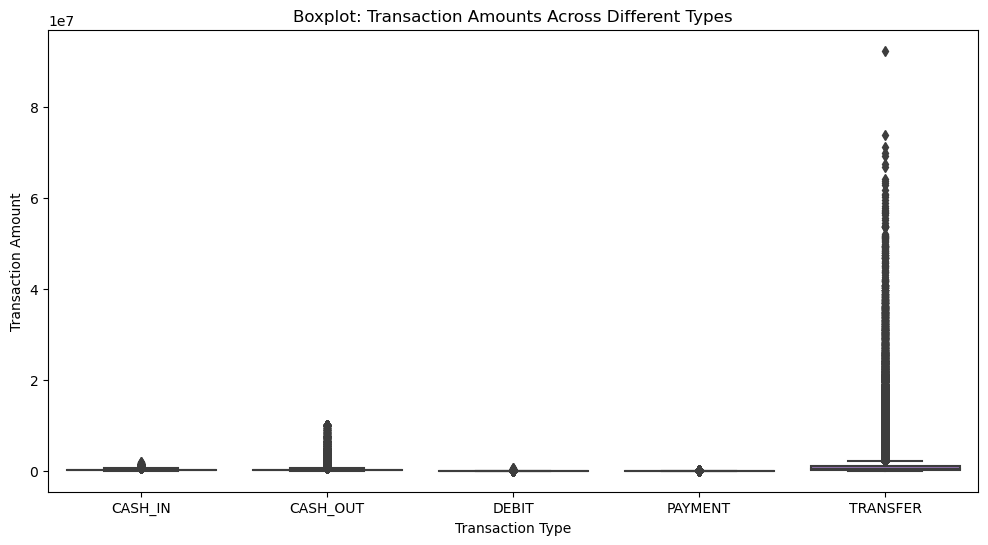

In [17]:
# Boxplot: Transaction Amounts Across Different Types
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', data=mydata)
plt.title('Boxplot: Transaction Amounts Across Different Types')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

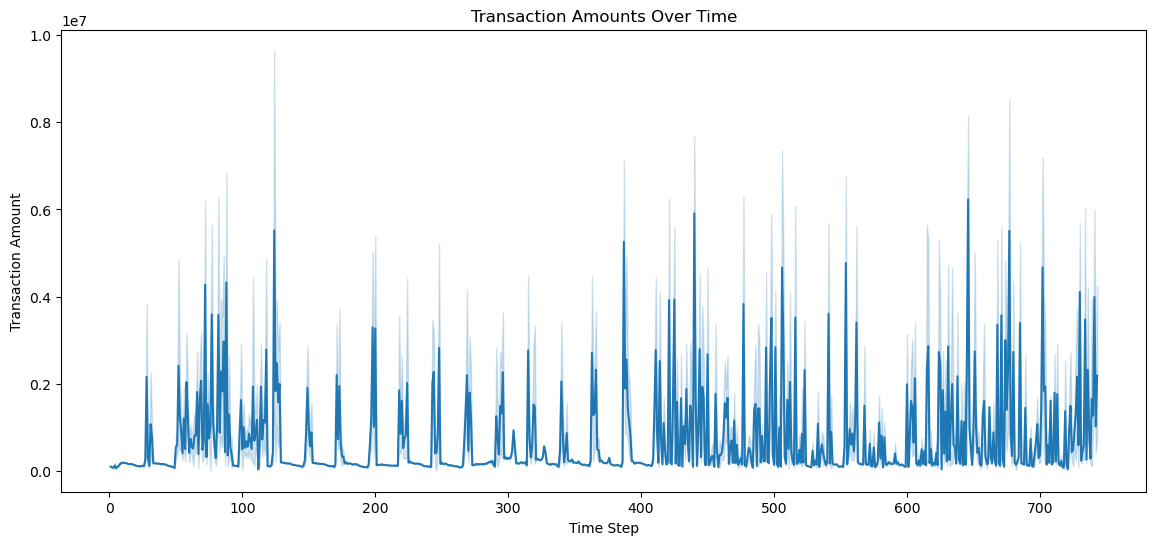

In [18]:
# Plot Line Plot of Transaction Amounts Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x="step", y="amount", data=mydata)
plt.title("Transaction Amounts Over Time")
plt.xlabel("Time Step")
plt.ylabel("Transaction Amount")
plt.show()

#### Analysis of fraudulent transactions

In [19]:
# Descriptive Statistics
fraud_summary = mydata[mydata["isFraud"] == 1].describe()
non_fraud_summary = mydata[mydata["isFraud"] == 0].describe()
print(fraud_summary); print(non_fraud_summary)

              step        amount  oldbalanceOrig  newbalanceOrig  \
count  8213.000000  8.213000e+03    8.213000e+03    8.213000e+03   
mean    368.413856  1.467967e+06    1.649668e+06    1.923926e+05   
std     216.388690  2.404253e+06    3.547719e+06    1.965666e+06   
min       1.000000  0.000000e+00    0.000000e+00    0.000000e+00   
25%     181.000000  1.270913e+05    1.258224e+05    0.000000e+00   
50%     367.000000  4.414234e+05    4.389835e+05    0.000000e+00   
75%     558.000000  1.517771e+06    1.517771e+06    0.000000e+00   
max     743.000000  1.000000e+07    5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  isFraud  
count    8.213000e+03    8.213000e+03   8213.0  
mean     5.442496e+05    1.279708e+06      1.0  
std      3.336421e+06    3.908817e+06      0.0  
min      0.000000e+00    0.000000e+00      1.0  
25%      0.000000e+00    0.000000e+00      1.0  
50%      0.000000e+00    4.676420e+03      1.0  
75%      1.478287e+05    1.058725e+06      1

We'll be specifically analyzing only fraudulent transactions since this approach is likely to highlight patterns more distinctly.

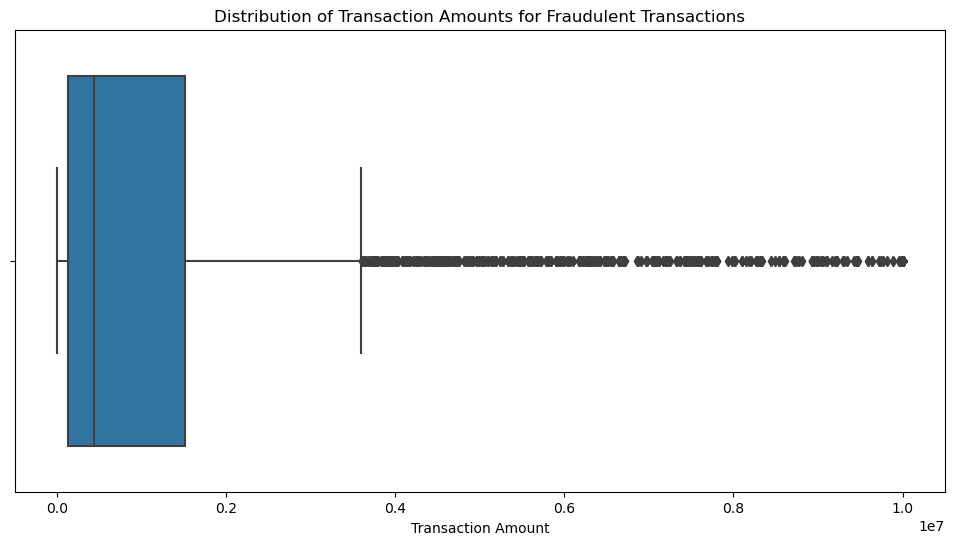

In [20]:
# Select only fraudulent transactions
fraudulent_data = mydata[mydata["isFraud"] == 1]

# Visualization of Transaction Amounts for Fraudulent Transactions
plt.figure(figsize=(12, 6))
sns.boxplot(x="amount", data=fraudulent_data)
plt.title("Distribution of Transaction Amounts for Fraudulent Transactions")
plt.xlabel("Transaction Amount")
plt.show()

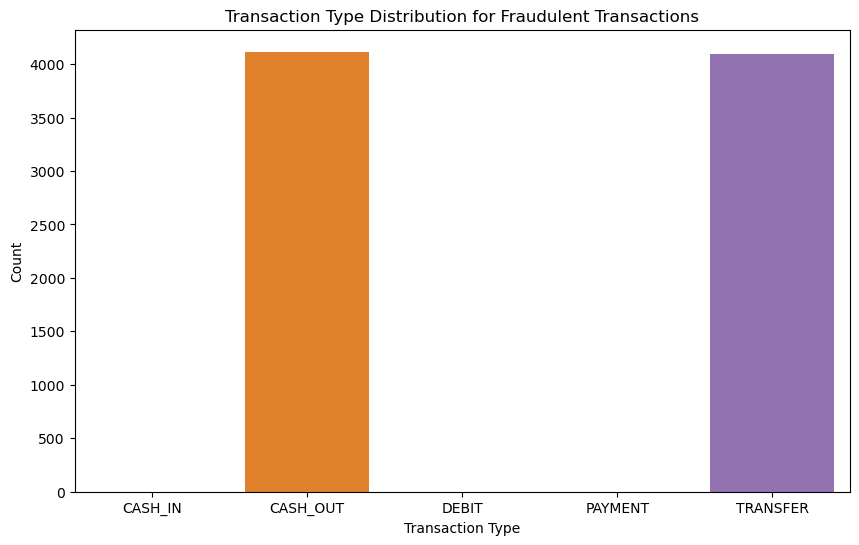

In [21]:
# Transaction Type Distribution for Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.countplot(x="type", data=fraudulent_data)
plt.title("Transaction Type Distribution for Fraudulent Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

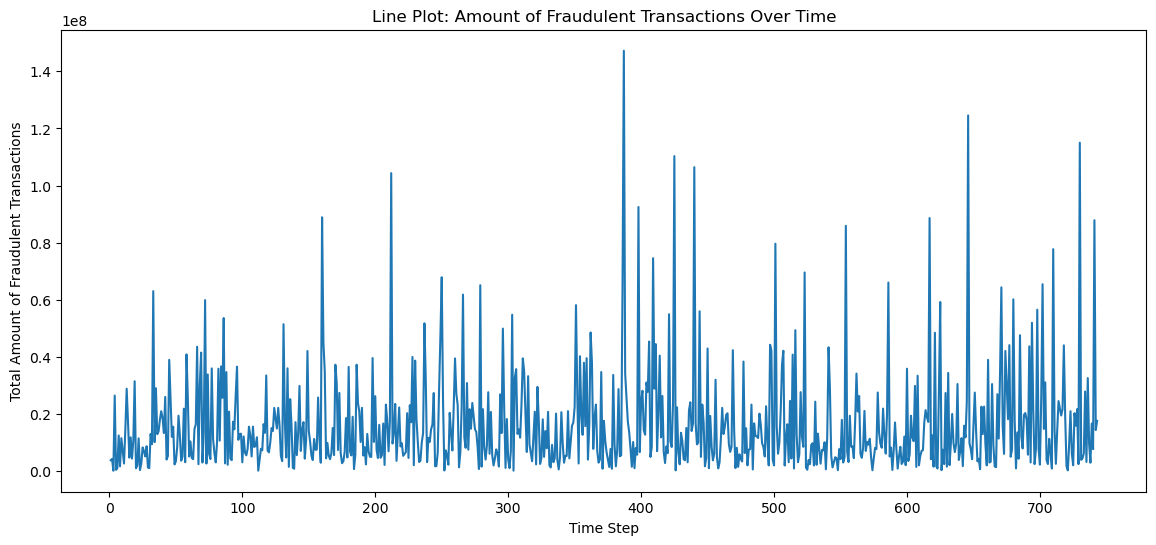

In [22]:
# Aggregate fraudulent transactions by time (e.g., hours)
fraudulent_time_aggregated = fraudulent_data.groupby("step")["amount"].sum().reset_index()

# Line Plot: Amount of Fraudulent Transactions Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x="step", y="amount", data=fraudulent_time_aggregated)
plt.title("Line Plot: Amount of Fraudulent Transactions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Total Amount of Fraudulent Transactions")
plt.show()